# Data Normalization & Feature Sets
In this notebook we will take our data gathered from **1_downloading_data.ipynb** and conduct the following: 
* Create a **pandas df**
* Add **3 features** represented as a column for each utilizing: https://github.com/mrjbq7/ta-lib
* Save our new **pandas df** as a **csv** within the same directory

### 3 feature set
```python
# tuple: first value = parameters, second value = features
features = {
    SMA: ([5,10,20], 4),
}
```

Once our new **pandas df** is created, we will then conduct a **sliding window** approach to create our images. This will be conducted in **notebook 3** 

## Oanda Error / Bug 
There seems to be a small *bug* when pulling data from **Oanda**. When you run **1_downloading_data.ipynb**, you may have put a date range such as: (2019,2,17) to (2019,3,10) 

For some reason, **Oanda** will then return that data with a new range set back a date. The data you wanted to pull was still pulled, it just seems to display differently. 

Therefor to correct this error we add **one day** to our **date column** and then make that our index


### side note
Trading days are **Monday to Friday** thus if you pulled data and it's not represented a certain way (skipped days), it's because of weekends.

In [18]:
import pandas as pd
import numpy as np
import os
from ta import *
import time
from datetime import date
from datetime import datetime 
from datetime import timedelta
import matplotlib.pyplot as plt

import talib
from talib import abstract
from talib import MA_Type

%matplotlib inline

In [2]:
# listing csv files
os.listdir(f'{os.curdir}/data/raw') 

['GBP_USD_D_2009-06-01_2018-06-01.csv']

In [3]:
# Change this value to the file you want
file = 'GBP_USD_D_2009-06-01_2018-06-01.csv'

In [4]:
# loading data
data_path = f'{os.curdir}/data/raw/{file}'
df = pd.read_csv(data_path, names=['time', 'complete', 'open', 'high', 'low', 'close', 'volume'])

"""THE FOLLOWING ASSUMED YOU HAVE USED OANDA API TO SCRAPE DATA"""
# converting time to datetime
df['time'] = pd.to_datetime(df['time'])

# correcting our error 
df['time'] = df['time'] + timedelta(days=1)

# setting time as our index
df.set_index('time',inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2670 entries, 2009-06-01 21:00:00 to 2018-06-01 21:00:00
Data columns (total 6 columns):
complete    2670 non-null bool
open        2670 non-null float64
high        2670 non-null float64
low         2670 non-null float64
close       2670 non-null float64
volume      2670 non-null int64
dtypes: bool(1), float64(4), int64(1)
memory usage: 127.8 KB


In [6]:
# Making copy
f_df = df.copy()

In [7]:
"""
SMA
Parameters = [15, 20, 25, 30]
"""
f_df['SMA_5'] = talib.SMA(f_df['close'], timeperiod=5)
f_df['SMA_10'] = talib.SMA(f_df['close'], timeperiod=10)
f_df['SMA_20'] = talib.SMA(f_df['close'], timeperiod=20)

In [12]:
# Trimming it down - removing NAN
f_df.dropna(inplace=True)

In [15]:
# removing columns we don't need
f_df.drop(columns=['complete', 'volume', 'high', 'low'], inplace=True)

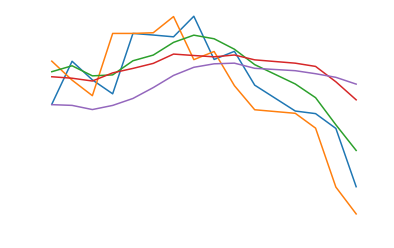

In [60]:
# Creating a test image 
test_1 = f_df.iloc[:15]

plt.plot(test_1['open'])
plt.plot(test_1['close'])
plt.plot(test_1['SMA_5'])
plt.plot(test_1['SMA_10'])
plt.plot(test_1['SMA_20'])
plt.axis('off')
plt.show()

In [61]:
#saving datastore to our post_processing directory
path = f'{os.curdir}/data/post_processing'
f_df.to_csv(f'{path}/datastore.csv',index=True)